# Trực quan hóa dữ liệu đầu vào

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import cv2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_dir = '/kaggle/input/fer2013/train/'
test_dir = '/kaggle/input/fer2013/test/'

In [4]:
def Classes_Count(path, name):
    Classes_Dict = {}
    
    for Class in os.listdir(path):
        
        Full_Path = os.path.join(path, Class)
        Classes_Dict[Class] = len(os.listdir(Full_Path))
        
    df = pd.DataFrame(Classes_Dict, index=[name])
    
    return df

Train_Count = Classes_Count(train_dir, 'Train').transpose().sort_values(by="Train", ascending=False)
Test_Count = Classes_Count(test_dir, 'Test').transpose().sort_values(by="Test", ascending=False)

In [5]:
group_check = pd.concat([Train_Count,Test_Count] , axis=1)
group_check

,Train,Test
happy,7215,1774
neutral,4965,1233
sad,4830,1247
fear,4097,1024
angry,3995,958
surprise,3171,831
disgust,436,111


<Figure size 1500x500 with 0 Axes>

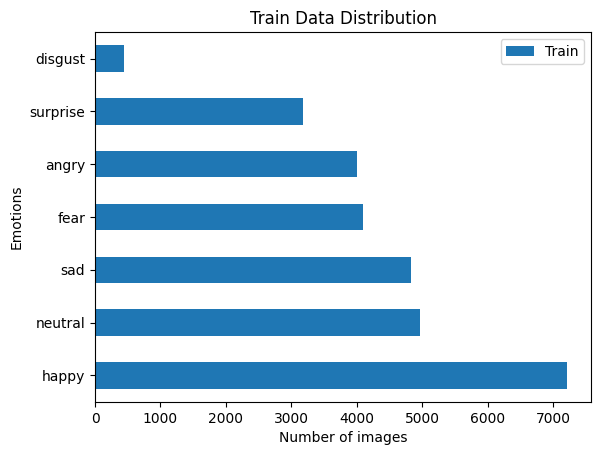

In [6]:
plt.figure(figsize=(15,5))
Train_Count.plot(kind='barh')
plt.title('Train Data Distribution')
plt.xlabel('Number of images')
plt.ylabel('Emotions')
plt.show()


<Figure size 1500x500 with 0 Axes>

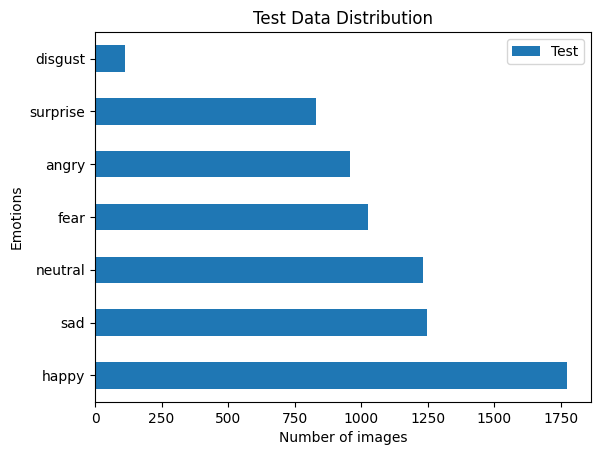

In [7]:
plt.figure(figsize=(15,5))
Test_Count.plot(kind='barh')
plt.title('Test Data Distribution')
plt.xlabel('Number of images')
plt.ylabel('Emotions')
plt.show()


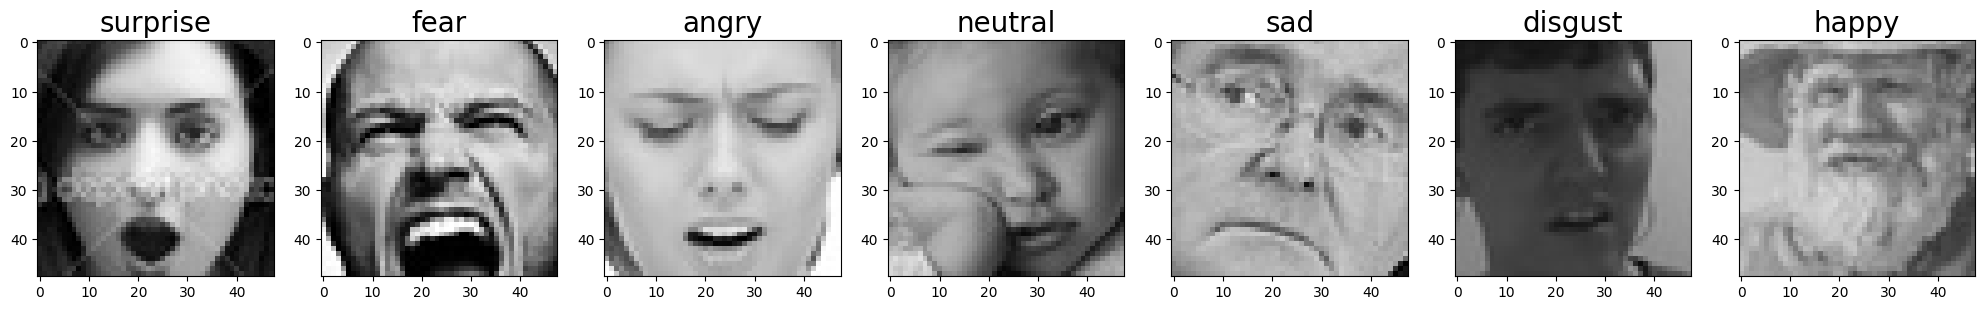

In [8]:
plt.style.use('default')
plt.figure(figsize = (25, 8))
image_count = 1

for directory in os.listdir(train_dir):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(train_dir +'/'+ directory)):
            if i == 1:
                break
            else:
                fig = plt.subplot(1, 7, image_count)
                image_count += 1
                image = cv2.imread(train_dir + directory + '/' + file)
                plt.imshow(image)
                plt.title(directory, fontsize = 20)

# Chia tập dữ liệu train - valid - test

In [10]:
# scikit-learn
from sklearn.model_selection import train_test_split
from os import *
import glob
import shutil
from random import seed, random

In [11]:
def create_label(x):
    if "angry" in x:
        return 0
    elif "disgust" in x:
        return 1
    elif "fear" in x:
        return 2
    elif "happy" in x:
        return 3
    elif "neutral" in x:
        return 4
    elif "sad" in x:
        return 5
    elif "surprise" in x:
        return 6

In [12]:
def create_label_name(x):
    if "angry" in x:
        return "angry"
    elif "disgust" in x:
        return "disgust"
    elif "fear" in x:
        return "fear"
    elif "happy" in x:
        return "happy"
    elif "neutral" in x:
        return "neutral"
    elif "sad" in x:
        return "sad"
    elif "surprise" in x:
        return "surprise"

In [13]:
def load_image_into_dataframe(_path):
    images = os.listdir(_path)
    df = pd.DataFrame(images)
    df = df.rename(columns={0: "image"})
    df['image'] = df['image'].apply(lambda x: _path + "/" +x)
    df['label'] = df['image'].apply(lambda x: create_label(x))
    df['label_name'] = df['image'].apply(lambda x: create_label_name(x))
    return df

In [14]:
train_1 = "/kaggle/input/fer2013/train/angry"
train_2 = "/kaggle/input/fer2013/train/disgust"
train_3 = "/kaggle/input/fer2013/train/fear"
train_4 = "/kaggle/input/fer2013/train/happy"
train_5 = "/kaggle/input/fer2013/train/neutral"
train_6 = "/kaggle/input/fer2013/train/sad"
train_7 = "/kaggle/input/fer2013/train/surprise"

In [15]:
test_1 = "/kaggle/input/fer2013/test/angry"
test_2 = "/kaggle/input/fer2013/test/disgust"
test_3 = "/kaggle/input/fer2013/test/fear"
test_4 = "/kaggle/input/fer2013/test/happy"
test_5 = "/kaggle/input/fer2013/test/neutral"
test_6 = "/kaggle/input/fer2013/test/sad"
test_7 = "/kaggle/input/fer2013/test/surprise"

In [16]:
dir_path = []
dir_path.append(train_1)
dir_path.append(train_2)
dir_path.append(train_3)
dir_path.append(train_4)
dir_path.append(train_5)
dir_path.append(train_6)
dir_path.append(train_7)
dir_path.append(test_1)
dir_path.append(test_2)
dir_path.append(test_3)
dir_path.append(test_4)
dir_path.append(test_5)
dir_path.append(test_6)
dir_path.append(test_7)

In [17]:
i = 1
for _check in dir_path:
    print(f"-------------{_check}---------")
    if i == 1:
        checkset = load_image_into_dataframe(_check)
        i = i + 1
    else:
        checkset = pd.concat([checkset, load_image_into_dataframe(_check)])

-------------/kaggle/input/fer2013/train/angry---------
-------------/kaggle/input/fer2013/train/disgust---------
-------------/kaggle/input/fer2013/train/fear---------
-------------/kaggle/input/fer2013/train/happy---------
-------------/kaggle/input/fer2013/train/neutral---------
-------------/kaggle/input/fer2013/train/sad---------
-------------/kaggle/input/fer2013/train/surprise---------
-------------/kaggle/input/fer2013/test/angry---------
-------------/kaggle/input/fer2013/test/disgust---------
-------------/kaggle/input/fer2013/test/fear---------
-------------/kaggle/input/fer2013/test/happy---------
-------------/kaggle/input/fer2013/test/neutral---------
-------------/kaggle/input/fer2013/test/sad---------
-------------/kaggle/input/fer2013/test/surprise---------


<Axes: xlabel='label'>

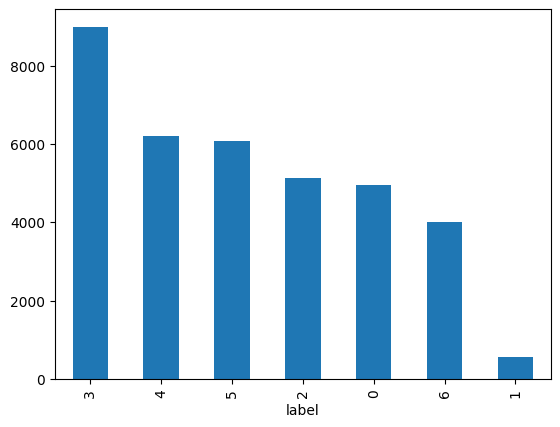

In [18]:
checkset.label.value_counts().plot.bar()

<Axes: xlabel='label_name'>

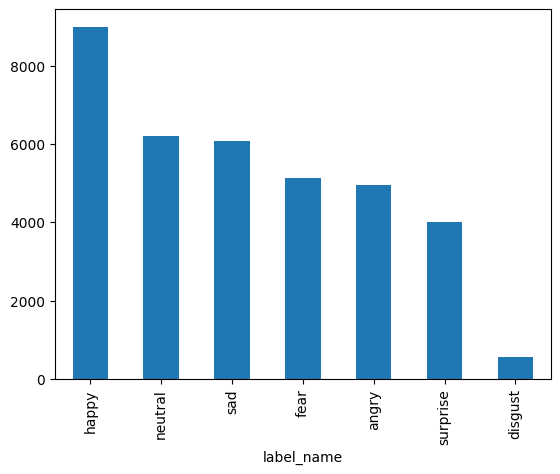

In [19]:
checkset.label_name.value_counts().plot.bar()

In [20]:
df_0 = checkset[checkset.label == 0]
df_1 = checkset[checkset.label == 1]
df_2 = checkset[checkset.label == 2]
df_3 = checkset[checkset.label == 3]
df_4 = checkset[checkset.label == 4]
df_5 = checkset[checkset.label == 5]
df_6 = checkset[checkset.label == 6]
print(len(df_0))
print(len(df_1))
print(len(df_2))
print(len(df_3))
print(len(df_4))
print(len(df_5))
print(len(df_6))

4953
547
5121
8989
6198
6077
4002


In [21]:
df_0 = df_0.sample(frac = 1)
df_0 = df_0.head(500)
X_0 = df_0['image']
y_0 = df_0['label']
X_trainval_0, X_test_0, y_trainval_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.2, random_state = 42)
X_train_0, X_val_0, y_train_0, y_val_0 = train_test_split(X_trainval_0, y_trainval_0, test_size = 0.2, random_state = 42)
X_train_0.shape, X_val_0.shape, X_test_0.shape, y_train_0.shape, y_val_0.shape, y_test_0.shape

((320,), (80,), (100,), (320,), (80,), (100,))

In [22]:
df_1 = df_1.sample(frac = 1)
df_1 = df_1.head(500)
X_1 = df_1['image']
y_1 = df_1['label']
X_trainval_1, X_test_1, y_trainval_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2, random_state = 42)
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_trainval_1, y_trainval_1, test_size = 0.2, random_state = 42)
X_train_1.shape, X_val_1.shape, X_test_1.shape, y_train_1.shape, y_val_1.shape, y_test_1.shape

((320,), (80,), (100,), (320,), (80,), (100,))

In [23]:
df_2 = df_2.sample(frac = 1)
df_2 = df_2.head(500)
X_2 = df_2['image']
y_2 = df_2['label']
X_trainval_2, X_test_2, y_trainval_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 42)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_trainval_2, y_trainval_2, test_size = 0.2, random_state = 42)
X_train_2.shape, X_val_2.shape, X_test_2.shape, y_train_2.shape, y_val_2.shape, y_test_2.shape

((320,), (80,), (100,), (320,), (80,), (100,))

In [24]:
df_3 = df_3.sample(frac = 1)
df_3 = df_3.head(500)
X_3 = df_3['image']
y_3 = df_3['label']
X_trainval_3, X_test_3, y_trainval_3, y_test_3 = train_test_split(X_3, y_3, test_size = 0.2, random_state = 42)
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(X_trainval_3, y_trainval_3, test_size = 0.2, random_state = 42)
X_train_3.shape, X_val_3.shape, X_test_3.shape, y_train_3.shape, y_val_3.shape, y_test_3.shape

((320,), (80,), (100,), (320,), (80,), (100,))

In [25]:
df_4 = df_4.sample(frac = 1)
df_4 = df_4.head(500)
X_4 = df_4['image']
y_4 = df_4['label']
X_trainval_4, X_test_4, y_trainval_4, y_test_4 = train_test_split(X_4, y_4, test_size = 0.2, random_state = 42)
X_train_4, X_val_4, y_train_4, y_val_4 = train_test_split(X_trainval_4, y_trainval_4, test_size = 0.2, random_state = 42)
X_train_4.shape, X_val_4.shape, X_test_4.shape, y_train_4.shape, y_val_4.shape, y_test_4.shape

((320,), (80,), (100,), (320,), (80,), (100,))

In [26]:
df_5 = df_5.sample(frac = 1)
df_5 = df_5.head(500)
X_5 = df_5['image']
y_5 = df_5['label']
X_trainval_5, X_test_5, y_trainval_5, y_test_5 = train_test_split(X_5, y_5, test_size = 0.2, random_state = 42)
X_train_5, X_val_5, y_train_5, y_val_5 = train_test_split(X_trainval_5, y_trainval_5, test_size = 0.2, random_state = 42)
X_train_5.shape, X_val_5.shape, X_test_5.shape, y_train_5.shape, y_val_5.shape, y_test_5.shape

((320,), (80,), (100,), (320,), (80,), (100,))

In [27]:
df_6 = df_6.sample(frac = 1)
df_6 = df_6.head(500)
X_6 = df_6['image']
y_6 = df_6['label']
X_trainval_6, X_test_6, y_trainval_6, y_test_6 = train_test_split(X_6, y_6, test_size = 0.2, random_state = 42)
X_train_6, X_val_6, y_train_6, y_val_6 = train_test_split(X_trainval_6, y_trainval_6, test_size = 0.2, random_state = 42)
X_train_6.shape, X_val_6.shape, X_test_6.shape, y_train_6.shape, y_val_6.shape, y_test_6.shape

((320,), (80,), (100,), (320,), (80,), (100,))

In [28]:
X_train = pd.concat([X_train_0, X_train_1, X_train_2, X_train_3, X_train_4, X_train_5, X_train_6], axis=0).to_frame()
y_train = pd.concat([y_train_0, y_train_1, y_train_2, y_train_3, y_train_4, y_train_5, y_train_6], axis=0).to_frame()
X_val = pd.concat([X_val_0, X_val_1, X_val_2, X_val_3, X_val_4, X_val_5, X_val_6], axis=0).to_frame()
y_val = pd.concat([y_val_0, y_val_1, y_val_2, y_val_3, y_val_4, y_val_5, y_val_6], axis=0).to_frame()
X_test = pd.concat([X_test_0, X_test_1, X_test_2, X_test_3, X_test_4, X_test_5, X_test_6], axis=0).to_frame()
y_test = pd.concat([y_test_0, y_test_1, y_test_2, y_test_3, y_test_4, y_test_5, y_test_6], axis=0).to_frame()

In [29]:
trainset = pd.concat([X_train, y_train], axis=1)
valset = pd.concat([X_val, y_val], axis=1)
testset = pd.concat([X_test, y_test], axis=1)

In [30]:
dataset_home = '/kaggle/working/'
subdirs = ['train/', 'val/', 'test/']

In [31]:
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ["angry/", "disgust/", "fear/", "happy/", "neutral/", "sad/", "surprise/"]
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

In [32]:
def save_imgs_split(dataset, path_save):
    for file in dataset.image.to_numpy():
#         print(file)
        if "angry" in file:
            shutil.copy(file, path_save  + "angry")
        elif "disgust" in file:
            shutil.copy(file, path_save  +  "disgust")
        elif "fear" in file:
            shutil.copy(file, path_save  +  "fear")
        elif "happy" in file:
            shutil.copy(file, path_save  +  "happy")
        elif "neutral" in file:
            shutil.copy(file, path_save  +  "neutral")
        elif "sad" in file:
            shutil.copy(file, path_save  + "sad")
        elif "surprise" in file:
            shutil.copy(file, path_save  +  "surprise")

In [33]:
save_imgs_split(trainset,'/kaggle/working/train/')
save_imgs_split(testset,'/kaggle/working/test/')
save_imgs_split(valset,'/kaggle/working/val/')

# Data preprocessing

In [34]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [35]:
img_shape = 48
batch_size = 64
train_dir = '/kaggle/working/train/'
val_dir = '/kaggle/working/val/'
test_dir = '/kaggle/working/test/'

In [36]:
data_augmentation = Sequential([
  keras.layers.RandomFlip("horizontal"),
  keras.layers.RandomRotation(0.2),
  keras.layers.RandomHeight(0.2),
  keras.layers.RandomWidth(0.2),
  keras.layers.RandomZoom(0.2),
#   keras.layers.experimental.preprocessing.Rescaling(1/255.) # rescale inputs of images to between 0 & 1, required for models like ResNet50 but i am using EfficientNetX
], name="data_augmentation")

In [37]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 labels ='inferred',
                                                                 label_mode="int",
                                                                 image_size=(img_shape, img_shape),
                                                                 batch_size=batch_size)

Found 2240 files belonging to 7 classes.


In [38]:
class_names = train_data.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


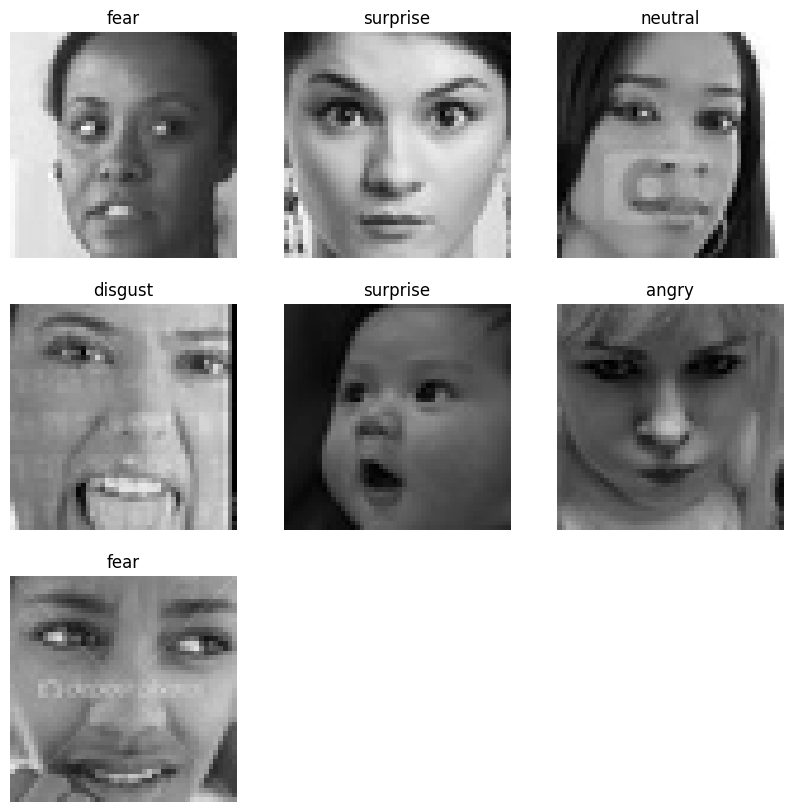

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(7):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [40]:
train_data = train_data.map(lambda x, y: (data_augmentation(x), y))

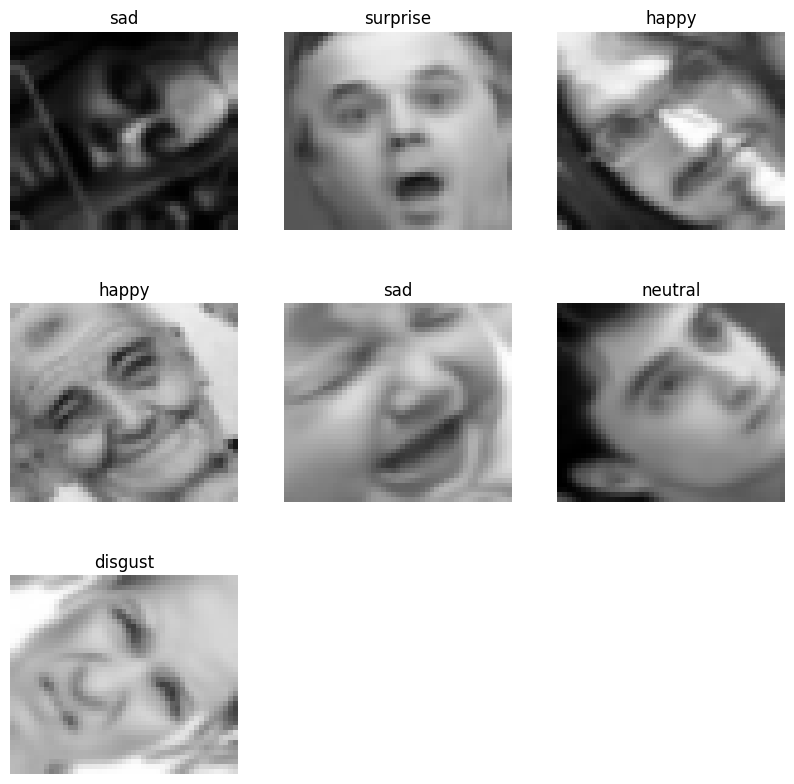

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(7):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [42]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                                labels ='inferred',
                                                                 label_mode="int",
                                                                 image_size=(img_shape, img_shape),
                                                                 batch_size=batch_size)

Found 560 files belonging to 7 classes.


In [43]:
val_data = val_data.map(lambda x, y: (data_augmentation(x), y))

In [44]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                labels ='inferred',
                                                                 label_mode="int",
                                                                 image_size=(img_shape, img_shape),
                                                                 batch_size=batch_size)

Found 700 files belonging to 7 classes.


In [45]:
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

# Xây dựng mô hình ResNet50 dựa trên kiến trúc của nó

## Build model

In [46]:
from tensorflow.keras.layers import *
from tensorflow.keras import layers , models, optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [47]:
def identity_block(inp, filters, kernel_size, block, layer):
    
    f1, f2, f3 = filters
    
    conv_name = 'id_conv_b' + block + '_l' + layer
    batch_name = 'id_batch_b' + block + '_l' + layer
    
    x = Conv2D(filters=f1, kernel_size=1, padding='same', kernel_initializer='he_normal', name=conv_name + '_a')(inp)
    x = BatchNormalization(name=batch_name + '_a')(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=f2, kernel_size=kernel_size, padding='same', kernel_initializer='he_normal', name=conv_name + '_b')(x)
    x = BatchNormalization(name=batch_name + '_b')(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=f3, kernel_size=1, padding='same', kernel_initializer='he_normal', name=conv_name + '_c')(x)
    x = BatchNormalization(name=batch_name + '_c')(x)
    
    add = Add()([inp, x])
    x = Activation('relu')(add)
    
    return x

In [48]:
def convolutional_block(inp, filters, kernel_size, block, layer, strides=2):
    
    f1, f2, f3 = filters
    
    conv_name = 'res_conv_b' + block + '_l' + layer
    batch_name = 'res_batch_b' + block + '_l' + layer
    
    y = Conv2D(filters=f1, kernel_size=1, padding='same', strides=strides, kernel_initializer='he_normal', name=conv_name + '_a')(inp)
    y = BatchNormalization(name=batch_name + '_a')(y)
    y = Activation('relu')(y)
    
    y = Conv2D(filters=f2, kernel_size=kernel_size, padding='same', kernel_initializer='he_normal', name=conv_name + '_b')(y)
    y = BatchNormalization(name=batch_name + '_b')(y)
    y = Activation('relu')(y)
    
    y = Conv2D(filters=f3, kernel_size=1, padding='same', kernel_initializer='he_normal', name=conv_name + '_c')(y)
    y = BatchNormalization(name=batch_name + '_c')(y)
    
    shortcut = Conv2D(filters=f3, kernel_size=1, strides=strides, kernel_initializer='he_normal', name=conv_name + '_shortcut')(inp)
    shortcut = BatchNormalization(name=batch_name + '_shortcut')(shortcut)
    
    add = Add()([shortcut, y])
    y = Activation('relu')(add)
    
    return y

In [49]:
def Create_ResNet50():
    inp = Input(shape=(img_shape, img_shape, 3), name='input')
    padd = ZeroPadding2D(3)(inp)

    conv1 = Conv2D(64, 7, strides=2, padding='valid', name='conv1')(padd)
    conv1 = BatchNormalization(name='batch2')(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = ZeroPadding2D(1)(conv1)
    conv1 = MaxPool2D(3, 2)(conv1)

    conv2 = convolutional_block(conv1, [64,64,256], 3, '2', '1', strides=1)
    conv2 = identity_block(conv2, [64,64,256], 3, '2', '2')
    conv2 = identity_block(conv2, [64,64,256], 3, '2', '3')

    conv3 = convolutional_block(conv2, [128,128,512], 3, '3', '1')
    conv3 = identity_block(conv3, [128,128,512], 3, '3', '2')
    conv3 = identity_block(conv3, [128,128,512], 3, '3', '3')
    conv3 = identity_block(conv3, [128,128,512], 3, '3', '4')

    conv4 = convolutional_block(conv3, [256,256,1024], 3, '4', '1')
    conv4 = identity_block(conv4, [256,256,1024], 3, '4', '2')
    conv4 = identity_block(conv4, [256,256,1024], 3, '4', '3')
    conv4 = identity_block(conv4, [256,256,1024], 3, '4', '4')
    conv4 = identity_block(conv4, [256,256,1024], 3, '4', '5')
    conv4 = identity_block(conv4, [256,256,1024], 3, '4', '6')

    conv5 = convolutional_block(conv4, [512,512,2048], 3, '5', '1')
    conv5 = identity_block(conv5, [512,512,2048], 3, '5', '2')
    conv5 = identity_block(conv5, [512,512,2048], 3, '5', '3')
    
    avg_pool = GlobalAveragePooling2D()(conv5)
    dense = Dense(1000, activation='softmax')(avg_pool)
    
    model = Model(inp, dense)
    return model

In [50]:
resnet50_custom = Create_ResNet50()
resnet50_custom.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 54, 54, 3)            0         ['input[0][0]']               
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 24, 24, 64)           9472      ['zero_padding2d[0][0]']      
                                                                                                  
 batch2 (BatchNormalization  (None, 24, 24, 64)           256       ['conv1[0][0]']           

In [51]:
resnet50_custom.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

## Specifying ResNet Callbacks

In [52]:
# Create Callback Checkpoint
checkpoint_path = "/kaggle/working/ResNet50_Model_Checkpoint"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 5, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning rate
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.000005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_data.cardinality().numpy()
validation_steps = val_data.cardinality().numpy()

## ResNet Training

In [53]:
ResNet_history = resnet50_custom.fit( train_data , validation_data= val_data , epochs=50, batch_size= batch_size,
                            callbacks=callbacks, steps_per_epoch= steps_per_epoch, validation_steps=validation_steps)

Epoch 1/50
35/35 [==============================] - 53s 347ms/step - loss: 2.8090 - accuracy: 0.1411 - val_loss: 762.8739 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - 2s 56ms/step - loss: 2.2692 - accuracy: 0.1741 - val_loss: 56.2204 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - 2s 59ms/step - loss: 1.8667 - accuracy: 0.3125 - val_loss: 21.8807 - val_accuracy: 0.1536 - lr: 0.0010
Epoch 4/50
35/35 [==============================] - 2s 57ms/step - loss: 2.1236 - accuracy: 0.2344 - val_loss: 18.6677 - val_accuracy: 0.1607 - lr: 0.0010
Epoch 5/50
35/35 [==============================] - 2s 55ms/step - loss: 1.5895 - accuracy: 0.4232 - val_loss: 4.4413 - val_accuracy: 0.1607 - lr: 0.0010
Epoch 6/50
35/35 [==============================] - 2s 58ms/step - loss: 1.7162 - accuracy: 0.3719 - val_loss: 6.0905 - val_accuracy: 0.1750 - lr: 0.0010
Epoch 7/50
35/35 [==============================] - ETA: 0s - loss: 1

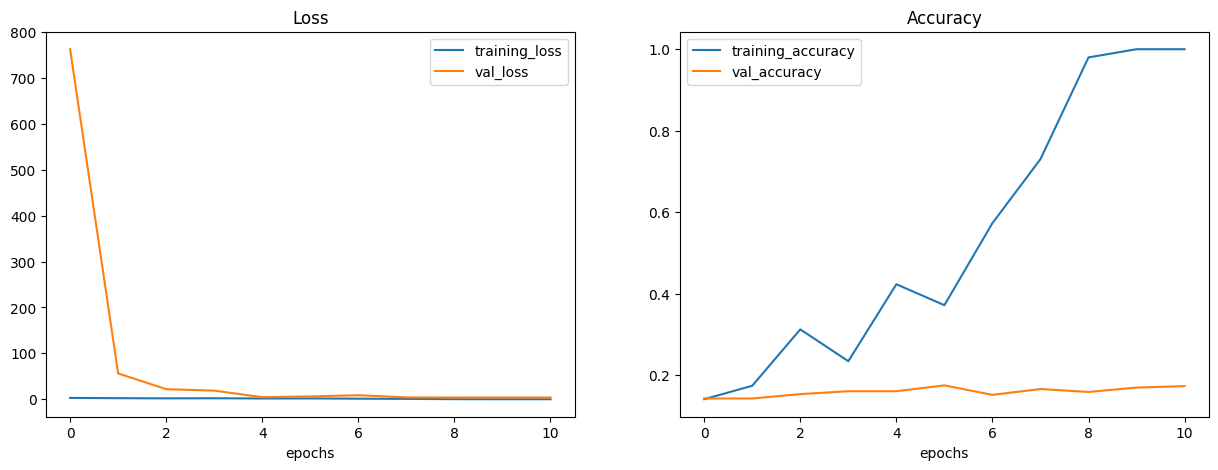

In [54]:
def plot_curves(history):
    
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15,5))

    #plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()
  
  #plt.tight_layout()
plot_curves(ResNet_history)

## Evaluating ResNet Model

In [55]:
model_score = resnet50_custom.evaluate(test_data)
print("    Test Loss: {:.5f}".format(model_score[0]))
print("Test Accuracy: {:.2f}%".format(model_score[1] * 100))

11/11 [==============================] - 1s 55ms/step - loss: 5.0642 - accuracy: 0.1571
    Test Loss: 5.06420
Test Accuracy: 15.71%


## Confusion Matrix

In [56]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
import numpy as np

In [57]:
ResNet50_image, ResNet50_label = test_data.as_numpy_iterator().next()
ResNet50_Predictions = np.argmax(resnet50_custom.predict_on_batch(ResNet50_image), axis=1)

Text(0.5, 1.0, 'ResNet50V2 Confusion Matrix')

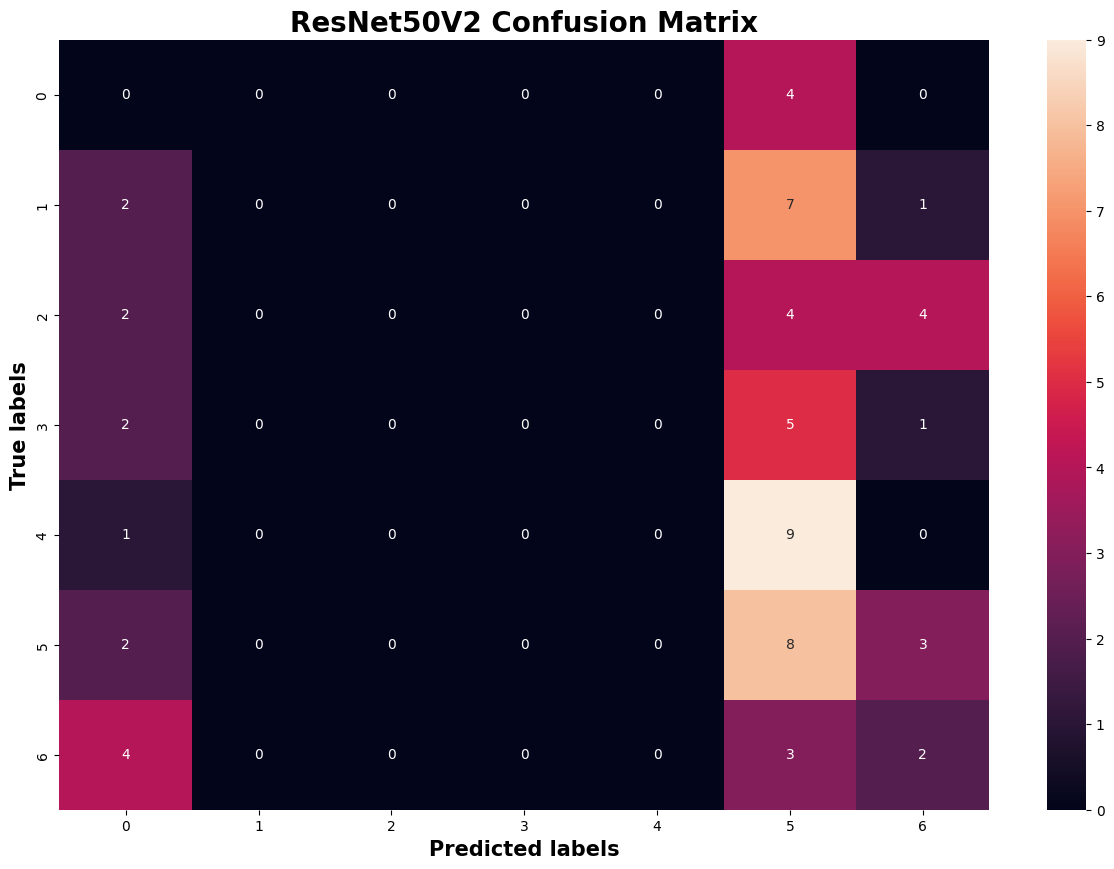

In [58]:
fig , ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(ResNet50_label, ResNet50_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('ResNet50V2 Confusion Matrix', fontsize=20, fontweight='bold')

In [59]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

print('---' * 10)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(ResNet50_label, ResNet50_Predictions, average='weighted')))
print('Precision Score: {:.2f}'.format(precision_score(ResNet50_label, ResNet50_Predictions, average='weighted')))
print('F1 Score: {:.2f}'.format(f1_score(ResNet50_label, ResNet50_Predictions, average='weighted')))
print('Accuracy Score: {:.2f}'.format(accuracy_score(ResNet50_label, ResNet50_Predictions)))
print('---' * 10)

------------------------------
Overfitting: 

Recall Score: 0.16
Precision Score: 0.07
F1 Score: 0.09
Accuracy Score: 0.16
------------------------------


## Predictions

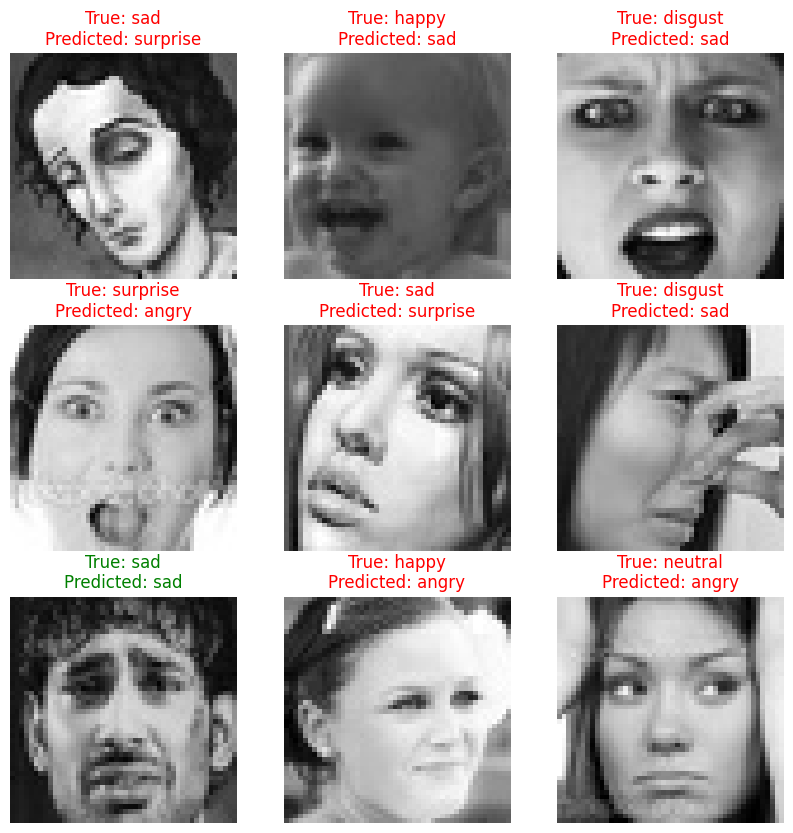

In [60]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(ResNet50_image[i].astype("uint8"))
    plt.axis("off")
    if class_names[ResNet50_label[i]] == class_names[ResNet50_Predictions[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {class_names[ResNet50_label[i]]}\nPredicted: {class_names[ResNet50_Predictions[i]]}", color=color)

## Save model

In [61]:
resnet50_custom.save("/kaggle/working/Model/ResNet50_Building.h5")

# ResNet50 trong thư viện Tensorflow

## Build model

In [62]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dropout,BatchNormalization, Flatten, Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
import tensorflow as tf

In [ ]:
pretrain_resnet50 = ResNet50(input_shape=(img_shape, img_shape, 3),
                                               include_top= False,
                                               weights= 'imagenet'
                                               )

In [ ]:
def build_ResNet50_Model():
    
    model = Sequential([
                      pretrain_resnet50,
                      Dropout(.25),
                      BatchNormalization(),
                      Flatten(),
                      Dense(64, activation='relu'),
                      BatchNormalization(),
                      Dropout(.5),
                      Dense(7,activation='softmax')
                    ])
    return model

In [ ]:
ResNet50_Model = build_ResNet50_Model()
# Say not to train first layer (ResNet) model as it is already trained
ResNet50_Model.layers[0].trainable = False #resnet lúc này được coi là layer đầu tiên của mạng luôn rồi, nên mình false cái trainable cho toàn bộ kiến trúc mạng này
ResNet50_Model.summary()

In [65]:
ResNet50_Model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

## Specifying ResNet Callbacks

In [69]:
checkpoint_path = "/kaggle/working/ResNet50_Model_Checkpoint"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 5, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.00005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_data.cardinality().numpy()
validation_steps = val_data.cardinality().numpy()

## ResNet Training

In [70]:
ResNet50_history = ResNet50_Model.fit(train_data ,validation_data = val_data , epochs=30, batch_size=batch_size,
                                         callbacks = callbacks, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/30


2024-01-11 05:39:21.835486: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


35/35 [==============================] - 17s 130ms/step - loss: 2.5537 - accuracy: 0.1625 - val_loss: 379.4757 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 2/30
35/35 [==============================] - 1s 34ms/step - loss: 2.1916 - accuracy: 0.1759 - val_loss: 29.8805 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 3/30
35/35 [==============================] - 1s 30ms/step - loss: 2.1771 - accuracy: 0.1804 - val_loss: 6.9261 - val_accuracy: 0.1268 - lr: 0.0010
Epoch 4/30
35/35 [==============================] - 1s 33ms/step - loss: 2.1730 - accuracy: 0.1683 - val_loss: 3.6389 - val_accuracy: 0.1589 - lr: 0.0010
Epoch 5/30
35/35 [==============================] - 1s 33ms/step - loss: 2.1373 - accuracy: 0.1661 - val_loss: 2.4969 - val_accuracy: 0.1804 - lr: 0.0010
Epoch 6/30
35/35 [==============================] - 1s 30ms/step - loss: 2.0927 - accuracy: 0.1652 - val_loss: 2.3623 - val_accuracy: 0.1446 - lr: 0.0010
Epoch 7/30
35/35 [==============================] - 1s 31ms/step - loss: 2.0823 - 

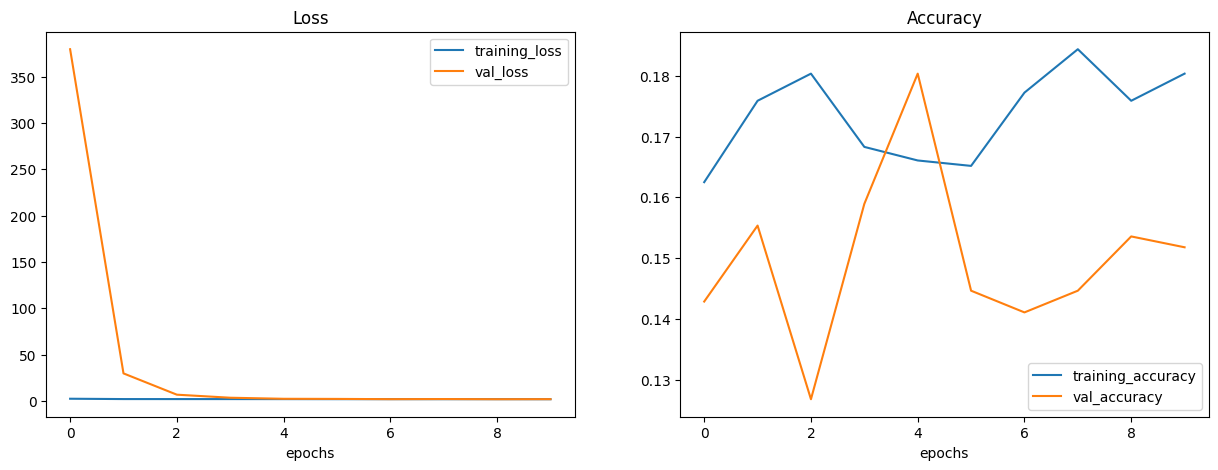

In [71]:
def plot_curves(history):
    
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15,5))

    #plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()
  
  #plt.tight_layout()
plot_curves(ResNet50_history)

## Evaluating ResNet50V2

In [72]:
ResNet50_Score = ResNet50_history.evaluate(test_data)

print("    Test Loss: {:.5f}".format(ResNet50_Score[0]))
print("Test Accuracy: {:.2f}%".format(ResNet50_Score[1] * 100))

11/11 [==============================] - 0s 47ms/step - loss: 2.5034 - accuracy: 0.1700
    Test Loss: 2.50339
Test Accuracy: 17.00%


## ResNet Confusion Matrix

In [73]:
ResNet50_image, ResNet50_label = test_data.as_numpy_iterator().next()
ResNet50_Predictions = np.argmax(ResNet50_history.predict_on_batch(ResNet50_image), axis=1)

Text(0.5, 1.0, 'ResNet50V2 Confusion Matrix')

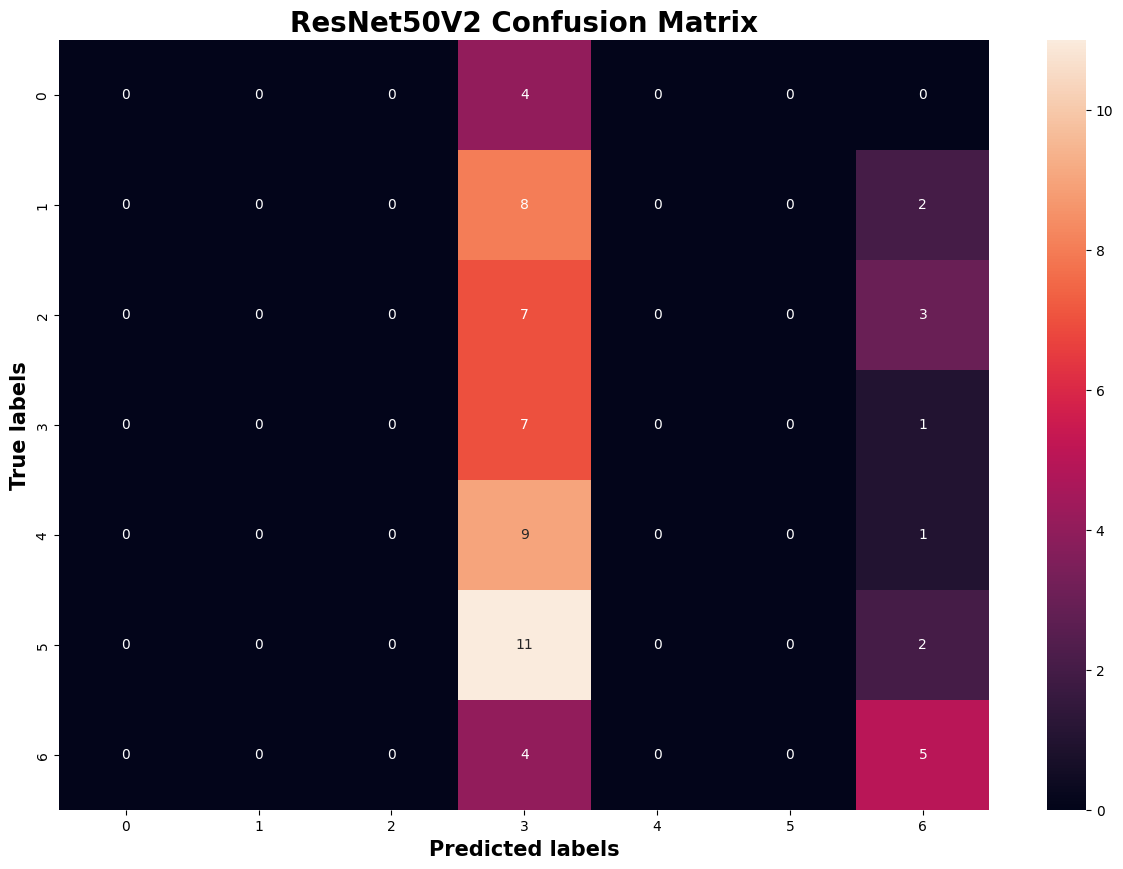

In [74]:
fig , ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(ResNet50_label, ResNet50_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('ResNet50V2 Confusion Matrix', fontsize=20, fontweight='bold')

In [75]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

print('---' * 10)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(ResNet50_label, ResNet50_Predictions, average='weighted')))
print('Precision Score: {:.2f}'.format(precision_score(ResNet50_label, ResNet50_Predictions, average='weighted')))
print('F1 Score: {:.2f}'.format(f1_score(ResNet50_label, ResNet50_Predictions, average='weighted')))
print('Accuracy Score: {:.2f}'.format(accuracy_score(ResNet50_label, ResNet50_Predictions)))
print('---' * 10)

------------------------------
Overfitting: 

Recall Score: 0.19
Precision Score: 0.07
F1 Score: 0.09
Accuracy Score: 0.19
------------------------------


## Predictions

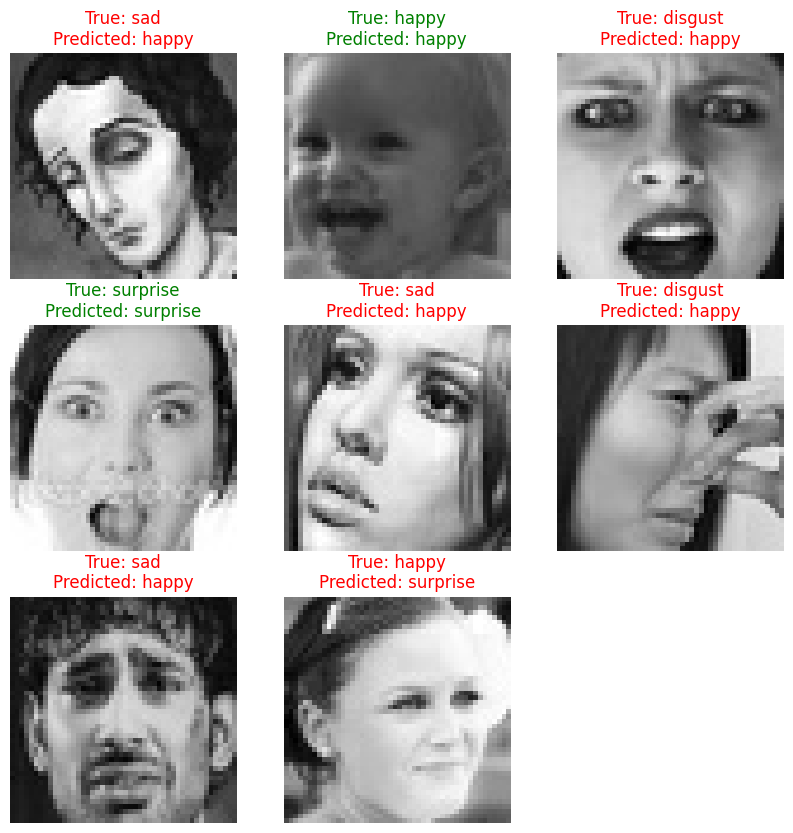

In [76]:
plt.figure(figsize=(10, 10))
for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(ResNet50_image[i].astype("uint8"))
    plt.axis("off")
    if class_names[ResNet50_label[i]] == class_names[ResNet50_Predictions[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {class_names[ResNet50_label[i]]}\nPredicted: {class_names[ResNet50_Predictions[i]]}", color=color)

## Save model

In [77]:
ResNet50_Model.save("/kaggle/working/Model/ResNet50_Library.h5")